"Object Detection with R-CNN: Training a Stop Sign Detector Using CIFAR-10 and CNN"

This notebook details the process of training a Region-based Convolutional Neural Network (R-CNN) for stop sign detection. Leveraging a Convolutional Neural Network (CNN) pretrained on CIFAR-10 data, the model is fine-tuned to recognize stop signs. The Comprehensive ImageNet Archive (CIFAR-10) dataset serves as the foundation for this training, providing a diverse set of images for improved generalization. The notebook aims to guide users through the implementation of an effective stop sign object detector using transfer learning and CNN architectures.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",
                   "dog", "frog", "horse", "ship", "truck"]

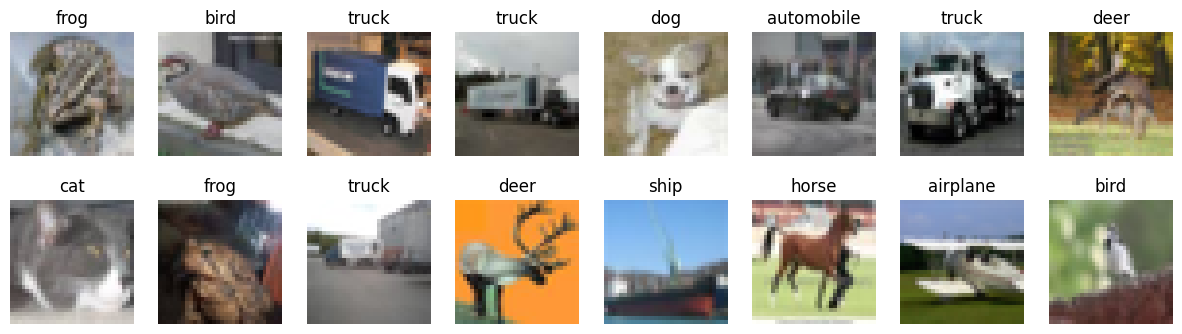

In [ ]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [ ]:
import keras
x_train2 = (x_train / 255) - 0.5
x_test2 = (x_test / 255) - 0.5
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train2 = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.activation import ReLU

In [ ]:
def make_model():
    """
    Returns `Sequential` model.
    """
    model = Sequential()
    model.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding='same'))
    model.add(ReLU(0.1))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(ReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(ReLU(0.1))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(ReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(ReLU(0.1))

    model.add(Dense(10, activation='softmax'))


    return model

In [ ]:
model = make_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 re_lu_35 (ReLU)             (None, 32, 32, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 re_lu_36 (ReLU)             (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 32)        9248      
                                                      

In [ ]:
INIT_LR = 0.001  # initial learning rate
BATCH_SIZE = 128
EPOCHS = 200

model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=INIT_LR, momentum=0.9)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=optimizer,  # for SGD
    metrics=['accuracy']  # report accuracy during training
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [ ]:
cnn_weights = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

In [ ]:
!pip install keras-utils

In [ ]:
import keras
import keras.utils

In [ ]:
!pip install tensorflow_addons

In [ ]:
# fit model
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()
# model.save_weights(cnn_weights.format(epoch=0))
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tqdm_callback],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
)

path = "/content/drive/MyDrive/Colab Notebooks/CNN_CIFAR/cnn_weights.hd5"
model.save(path, save_format='h5')

Training:   0%|           0/200 ETA: ?s,  ?epochs/s

Epoch 1/200


0/391           ETA: ?s - 

Epoch 2/200


0/391           ETA: ?s - 

Epoch 3/200


0/391           ETA: ?s - 

Epoch 4/200


0/391           ETA: ?s - 

Epoch 5/200


0/391           ETA: ?s - 

Epoch 6/200


0/391           ETA: ?s - 

Epoch 7/200


0/391           ETA: ?s - 

Epoch 8/200


0/391           ETA: ?s - 

Epoch 9/200


0/391           ETA: ?s - 

Epoch 10/200


0/391           ETA: ?s - 

Epoch 11/200


0/391           ETA: ?s - 

Epoch 12/200


0/391           ETA: ?s - 

Epoch 13/200


0/391           ETA: ?s - 

Epoch 14/200


0/391           ETA: ?s - 

Epoch 15/200


0/391           ETA: ?s - 

Epoch 16/200


0/391           ETA: ?s - 

Epoch 17/200


0/391           ETA: ?s - 

Epoch 18/200


0/391           ETA: ?s - 

Epoch 19/200


0/391           ETA: ?s - 

Epoch 20/200


0/391           ETA: ?s - 

Epoch 21/200


0/391           ETA: ?s - 

Epoch 22/200


0/391           ETA: ?s - 

Epoch 23/200


0/391           ETA: ?s - 

Epoch 24/200


0/391           ETA: ?s - 

Epoch 25/200


0/391           ETA: ?s - 

Epoch 26/200


0/391           ETA: ?s - 

Epoch 27/200


0/391           ETA: ?s - 

Epoch 28/200


0/391           ETA: ?s - 

Epoch 29/200


0/391           ETA: ?s - 

Epoch 30/200


0/391           ETA: ?s - 

Epoch 31/200


0/391           ETA: ?s - 

Epoch 32/200


0/391           ETA: ?s - 

Epoch 33/200


0/391           ETA: ?s - 

Epoch 34/200


0/391           ETA: ?s - 

Epoch 35/200


0/391           ETA: ?s - 

Epoch 36/200


0/391           ETA: ?s - 

Epoch 37/200


0/391           ETA: ?s - 

Epoch 38/200


0/391           ETA: ?s - 

Epoch 39/200


0/391           ETA: ?s - 

Epoch 40/200


0/391           ETA: ?s - 

Epoch 41/200


0/391           ETA: ?s - 

Epoch 42/200


0/391           ETA: ?s - 

Epoch 43/200


0/391           ETA: ?s - 

Epoch 44/200


0/391           ETA: ?s - 

Epoch 45/200


0/391           ETA: ?s - 

Epoch 46/200


0/391           ETA: ?s - 

Epoch 47/200


0/391           ETA: ?s - 

Epoch 48/200


0/391           ETA: ?s - 

Epoch 49/200


0/391           ETA: ?s - 

Epoch 50/200


0/391           ETA: ?s - 

Epoch 51/200


0/391           ETA: ?s - 

Epoch 52/200


0/391           ETA: ?s - 

Epoch 53/200


0/391           ETA: ?s - 

Epoch 54/200


0/391           ETA: ?s - 

Epoch 55/200


0/391           ETA: ?s - 

Epoch 56/200


0/391           ETA: ?s - 

Epoch 57/200


0/391           ETA: ?s - 

Epoch 58/200


0/391           ETA: ?s - 

Epoch 59/200


0/391           ETA: ?s - 

Epoch 60/200


0/391           ETA: ?s - 

Epoch 61/200


0/391           ETA: ?s - 

Epoch 62/200


0/391           ETA: ?s - 

Epoch 63/200


0/391           ETA: ?s - 

Epoch 64/200


0/391           ETA: ?s - 

Epoch 65/200


0/391           ETA: ?s - 

Epoch 66/200


0/391           ETA: ?s - 

Epoch 67/200


0/391           ETA: ?s - 

Epoch 68/200


0/391           ETA: ?s - 

Epoch 69/200


0/391           ETA: ?s - 

Epoch 70/200


0/391           ETA: ?s - 

Epoch 71/200


0/391           ETA: ?s - 

Epoch 72/200


0/391           ETA: ?s - 

Epoch 73/200


0/391           ETA: ?s - 

Epoch 74/200


0/391           ETA: ?s - 

Epoch 75/200


0/391           ETA: ?s - 

Epoch 76/200


0/391           ETA: ?s - 

Epoch 77/200


0/391           ETA: ?s - 

Epoch 78/200


0/391           ETA: ?s - 

Epoch 79/200


0/391           ETA: ?s - 

Epoch 80/200


0/391           ETA: ?s - 

Epoch 81/200


0/391           ETA: ?s - 

Epoch 82/200


0/391           ETA: ?s - 

Epoch 83/200


0/391           ETA: ?s - 

Epoch 84/200


0/391           ETA: ?s - 

Epoch 85/200


0/391           ETA: ?s - 

Epoch 86/200


0/391           ETA: ?s - 

Epoch 87/200


0/391           ETA: ?s - 

Epoch 88/200


0/391           ETA: ?s - 

Epoch 89/200


0/391           ETA: ?s - 

Epoch 90/200


0/391           ETA: ?s - 

Epoch 91/200


0/391           ETA: ?s - 

Epoch 92/200


0/391           ETA: ?s - 

Epoch 93/200


0/391           ETA: ?s - 

Epoch 94/200


0/391           ETA: ?s - 

Epoch 95/200


0/391           ETA: ?s - 

Epoch 96/200


0/391           ETA: ?s - 

Epoch 97/200


0/391           ETA: ?s - 

Epoch 98/200


0/391           ETA: ?s - 

Epoch 99/200


0/391           ETA: ?s - 

Epoch 100/200


0/391           ETA: ?s - 

Epoch 101/200


0/391           ETA: ?s - 

Epoch 102/200


0/391           ETA: ?s - 

Epoch 103/200


0/391           ETA: ?s - 

Epoch 104/200


0/391           ETA: ?s - 

Epoch 105/200


0/391           ETA: ?s - 

Epoch 106/200


0/391           ETA: ?s - 

Epoch 107/200


0/391           ETA: ?s - 

Epoch 108/200


0/391           ETA: ?s - 

Epoch 109/200


0/391           ETA: ?s - 

Epoch 110/200


0/391           ETA: ?s - 

Epoch 111/200


0/391           ETA: ?s - 

Epoch 112/200


0/391           ETA: ?s - 

Epoch 113/200


0/391           ETA: ?s - 

Epoch 114/200


0/391           ETA: ?s - 

Epoch 115/200


0/391           ETA: ?s - 

Epoch 116/200


0/391           ETA: ?s - 

Epoch 117/200


0/391           ETA: ?s - 

Epoch 118/200


0/391           ETA: ?s - 

Epoch 119/200


0/391           ETA: ?s - 

Epoch 120/200


0/391           ETA: ?s - 

Epoch 121/200


0/391           ETA: ?s - 

Epoch 122/200


0/391           ETA: ?s - 

Epoch 123/200


0/391           ETA: ?s - 

Epoch 124/200


0/391           ETA: ?s - 

Epoch 125/200


0/391           ETA: ?s - 

Epoch 126/200


0/391           ETA: ?s - 

Epoch 127/200


0/391           ETA: ?s - 

Epoch 128/200


0/391           ETA: ?s - 

Epoch 129/200


0/391           ETA: ?s - 

Epoch 130/200


0/391           ETA: ?s - 

Epoch 131/200


0/391           ETA: ?s - 

Epoch 132/200


0/391           ETA: ?s - 

Epoch 133/200


0/391           ETA: ?s - 

Epoch 134/200


0/391           ETA: ?s - 

Epoch 135/200


0/391           ETA: ?s - 

Epoch 136/200


0/391           ETA: ?s - 

Epoch 137/200


0/391           ETA: ?s - 

Epoch 138/200


0/391           ETA: ?s - 

Epoch 139/200


0/391           ETA: ?s - 

Epoch 140/200


0/391           ETA: ?s - 

Epoch 141/200


0/391           ETA: ?s - 

Epoch 142/200


0/391           ETA: ?s - 

Epoch 143/200


0/391           ETA: ?s - 

Epoch 144/200


0/391           ETA: ?s - 

Epoch 145/200


0/391           ETA: ?s - 

Epoch 146/200


0/391           ETA: ?s - 

Epoch 147/200


0/391           ETA: ?s - 

Epoch 148/200


0/391           ETA: ?s - 

Epoch 149/200


0/391           ETA: ?s - 

Epoch 150/200


0/391           ETA: ?s - 

Epoch 151/200


0/391           ETA: ?s - 

Epoch 152/200


0/391           ETA: ?s - 

Epoch 153/200


0/391           ETA: ?s - 

Epoch 154/200


0/391           ETA: ?s - 

Epoch 155/200


0/391           ETA: ?s - 

Epoch 156/200


0/391           ETA: ?s - 

Epoch 157/200


0/391           ETA: ?s - 

Epoch 158/200


0/391           ETA: ?s - 

Epoch 159/200


0/391           ETA: ?s - 

Epoch 160/200


0/391           ETA: ?s - 

Epoch 161/200


0/391           ETA: ?s - 

Epoch 162/200


0/391           ETA: ?s - 

Epoch 163/200


0/391           ETA: ?s - 

Epoch 164/200


0/391           ETA: ?s - 

Epoch 165/200


0/391           ETA: ?s - 

Epoch 166/200


0/391           ETA: ?s - 

Epoch 167/200


0/391           ETA: ?s - 

Epoch 168/200


0/391           ETA: ?s - 

Epoch 169/200


0/391           ETA: ?s - 

Epoch 170/200


0/391           ETA: ?s - 

Epoch 171/200


0/391           ETA: ?s - 

Epoch 172/200


0/391           ETA: ?s - 

Epoch 173/200


0/391           ETA: ?s - 

Epoch 174/200


0/391           ETA: ?s - 

Epoch 175/200


0/391           ETA: ?s - 

Epoch 176/200


0/391           ETA: ?s - 

Epoch 177/200


0/391           ETA: ?s - 

Epoch 178/200


0/391           ETA: ?s - 

Epoch 179/200


0/391           ETA: ?s - 

Epoch 180/200


0/391           ETA: ?s - 

Epoch 181/200


0/391           ETA: ?s - 

Epoch 182/200


0/391           ETA: ?s - 

Epoch 183/200


0/391           ETA: ?s - 

Epoch 184/200


0/391           ETA: ?s - 

Epoch 185/200


0/391           ETA: ?s - 

Epoch 186/200


0/391           ETA: ?s - 

Epoch 187/200


0/391           ETA: ?s - 

Epoch 188/200


0/391           ETA: ?s - 

Epoch 189/200


0/391           ETA: ?s - 

Epoch 190/200


0/391           ETA: ?s - 

Epoch 191/200


0/391           ETA: ?s - 

Epoch 192/200


0/391           ETA: ?s - 

Epoch 193/200


0/391           ETA: ?s - 

Epoch 194/200


0/391           ETA: ?s - 

Epoch 195/200


0/391           ETA: ?s - 

Epoch 196/200


0/391           ETA: ?s - 

Epoch 197/200


0/391           ETA: ?s - 

Epoch 198/200


0/391           ETA: ?s - 

Epoch 199/200


0/391           ETA: ?s - 

Epoch 200/200


0/391           ETA: ?s - 

In [ ]:
y_pred_test = model.predict(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

313/313 [==============================] - 1s 2ms/step


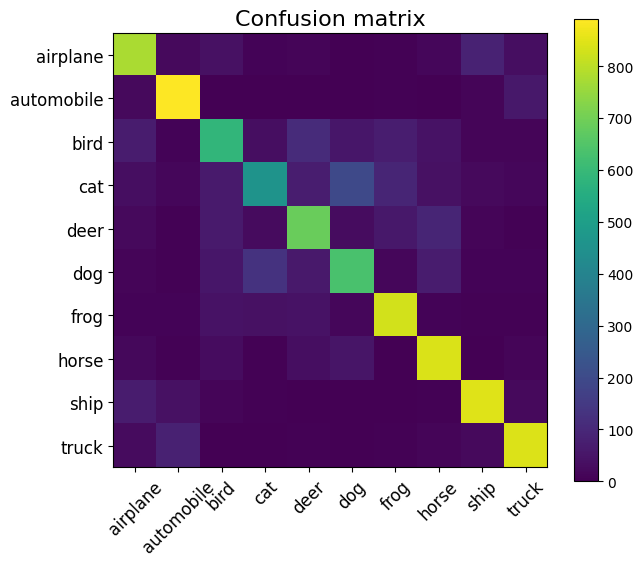

Test accuracy: 0.7385


In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

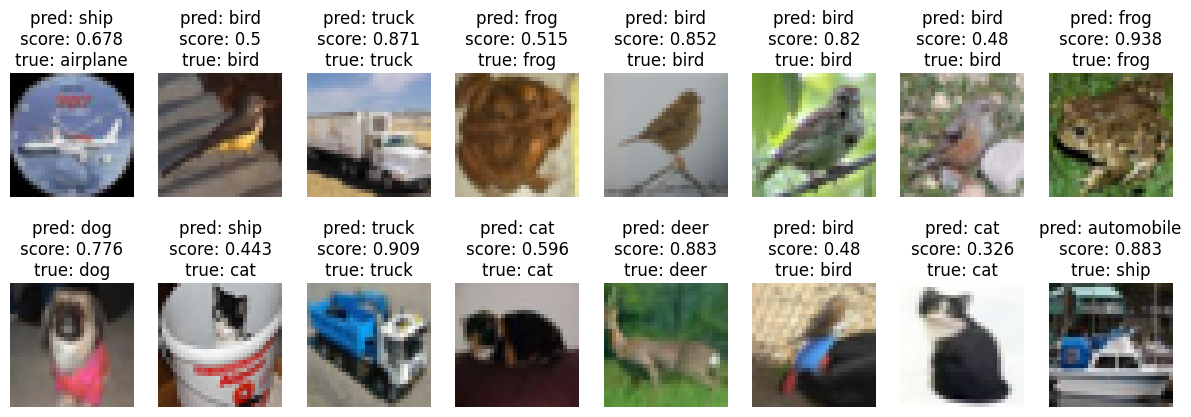

In [ ]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()